In [43]:
!pip install pandas matplotlib scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics

In [45]:
data = pd.read_csv(r"hiring.csv")
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [46]:

data['test_score(out of 10)'] = data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].median())

In [47]:
data["experience"] = data["experience"].fillna(0)

In [48]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


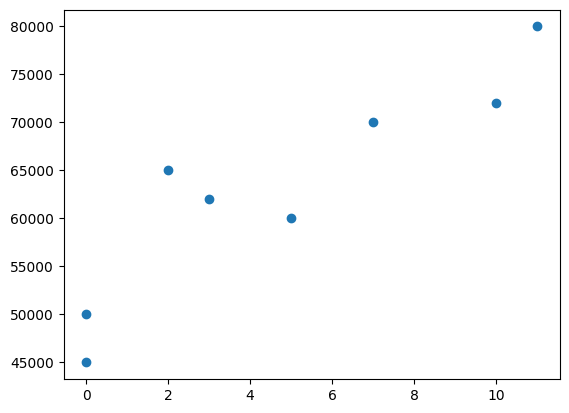

In [54]:
plt.scatter(data[['experience']],data[['salary($)']])

In [49]:
MLR = linear_model.LinearRegression()

In [56]:
MLR.fit(data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']],data[['salary($)']])

LinearRegression()

In [61]:
MLR.coef_

array([[2812.95487627, 1845.70596798, 2205.24017467]])

In [64]:
MLR.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [65]:
MLR.intercept_

array([17737.26346434])

In [72]:
MLR.predict([[12,8,2]])

/home/gitpod/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[70668.85007278]])

In [84]:
data.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [100]:
mse= metrics.mean_squared_error(data['salary($)'],MLR.predict(data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]))

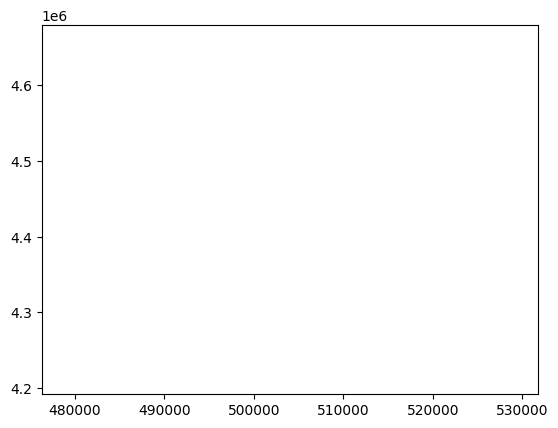

In [102]:
plt.plot(data['salary($)'],mse)

/home/gitpod/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


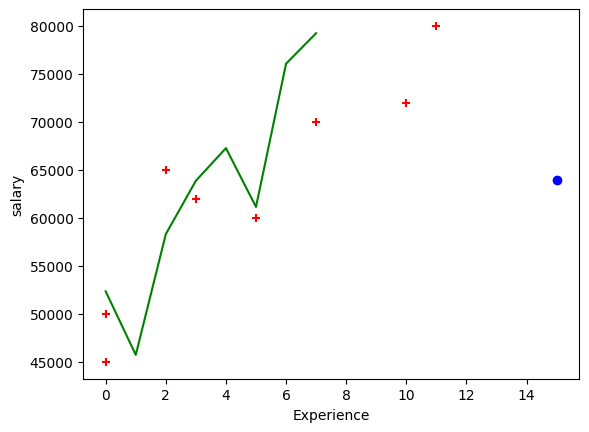

In [97]:
plt.xlabel("Experience")
plt.ylabel("salary")
plt.scatter(data['experience'],data['salary($)'],color='red',marker='+')
plt.scatter([[15]],MLR.predict([[15,1,1]]), color='blue', marker='o', label="Predicted (Last 5)")
plt.plot(MLR.predict(data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]),color="green")
